# Import Library 

In [11]:
import warnings
warnings.filterwarnings('ignore')

# Importing Neccessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Import helper functions
from importlib import reload
import distributionHelp
reload(distributionHelp)
import helper
reload(helper)
from helper import *

# Load data

In [12]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Section 1

In [13]:
# Load the dataset
db = pd.read_csv("diabetes_prediction_dataset.csv")
db = db.drop_duplicates()

Diabetes, Hypertension, & Heart Disease within the Dataset:

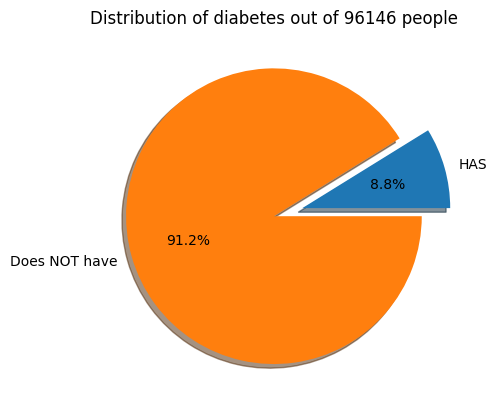

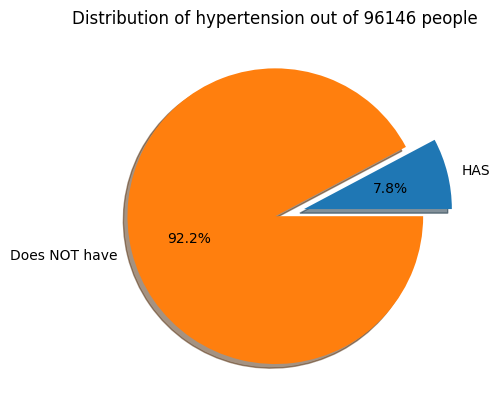

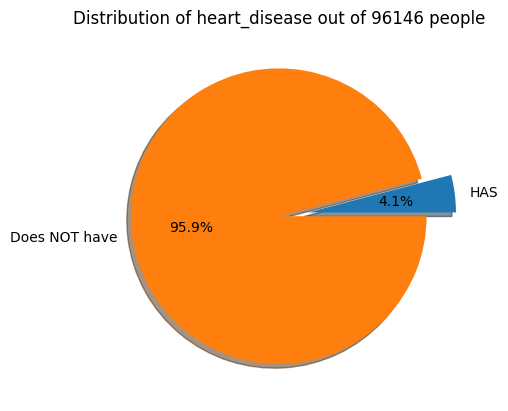

In [14]:
for category in ['diabetes', 'hypertension', 'heart_disease']:
  distributionHelp.binData(category)

Distribution of Age in Dataset:

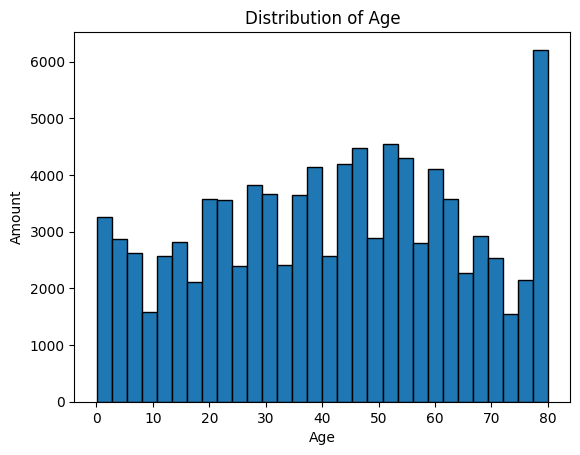

In [15]:
plt.hist(db['age'], bins=30,edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.show()

Distribution of Smoking History in Dataset:

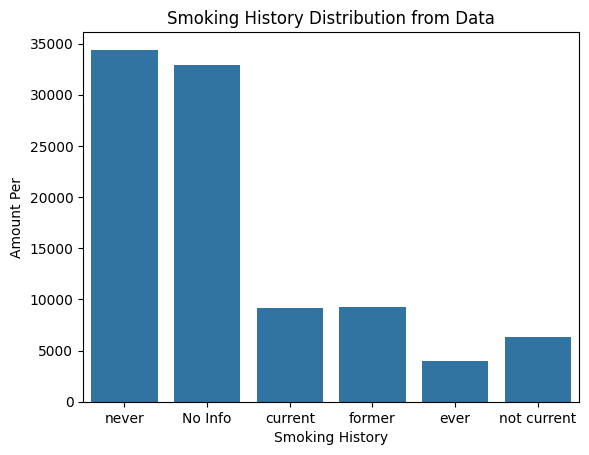

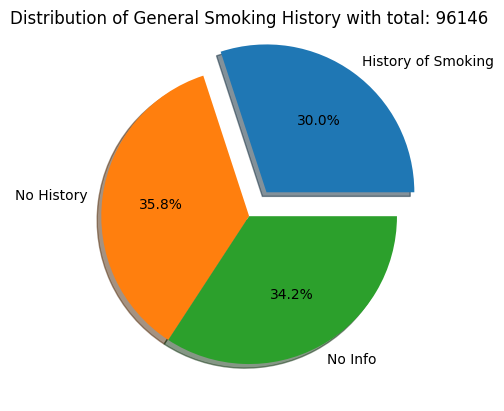

In [16]:
sns.countplot(x='smoking_history', data=db)
plt.title("Smoking History Distribution from Data")
plt.xlabel('Smoking History')
plt.ylabel('Amount Per')
plt.show()

distributionHelp.smokingHist()


BMI, HbA1c Level, and blood glucose level in the Dataset:

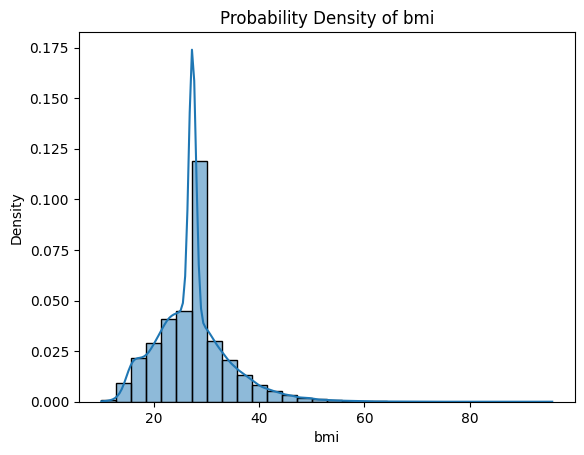

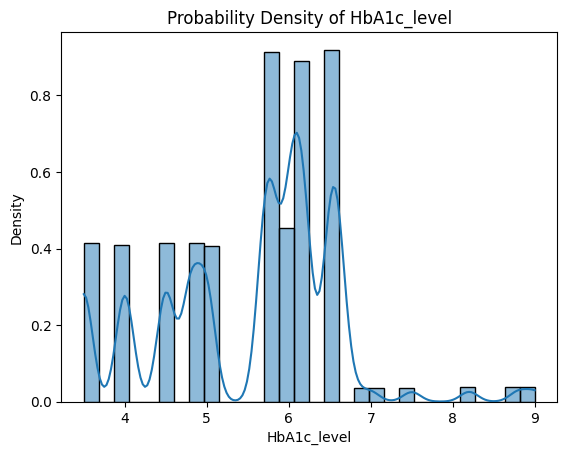

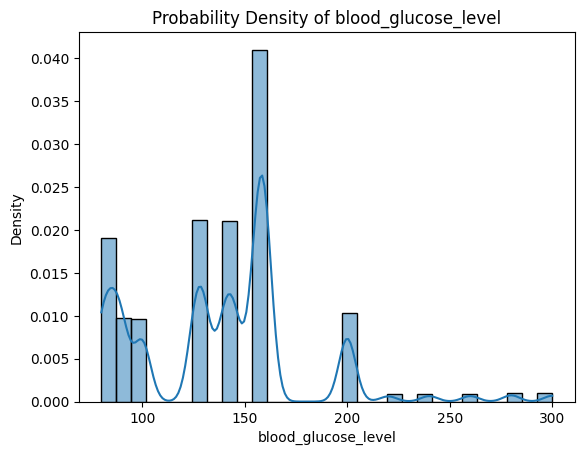

In [17]:
category = ['bmi', 'HbA1c_level', 'blood_glucose_level']
for col in category:
    distributionHelp.pdfPlot(col)

BMI health based on the CDC:
https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html

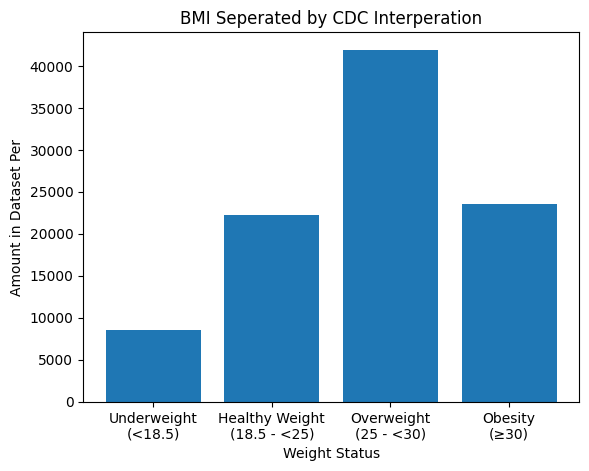

In [18]:
distributionHelp.cdcBMI()

BMI and Age with Diabetes vs Without

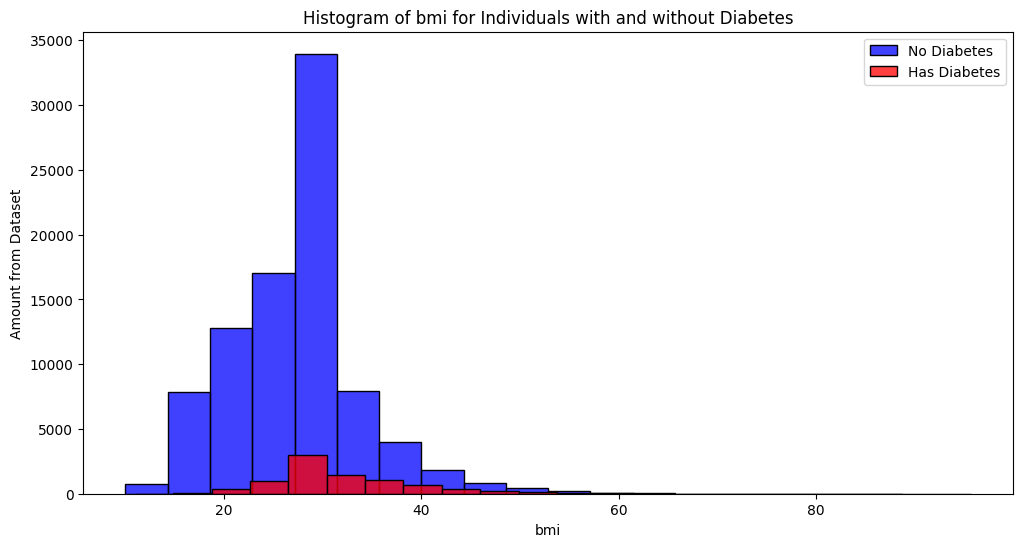

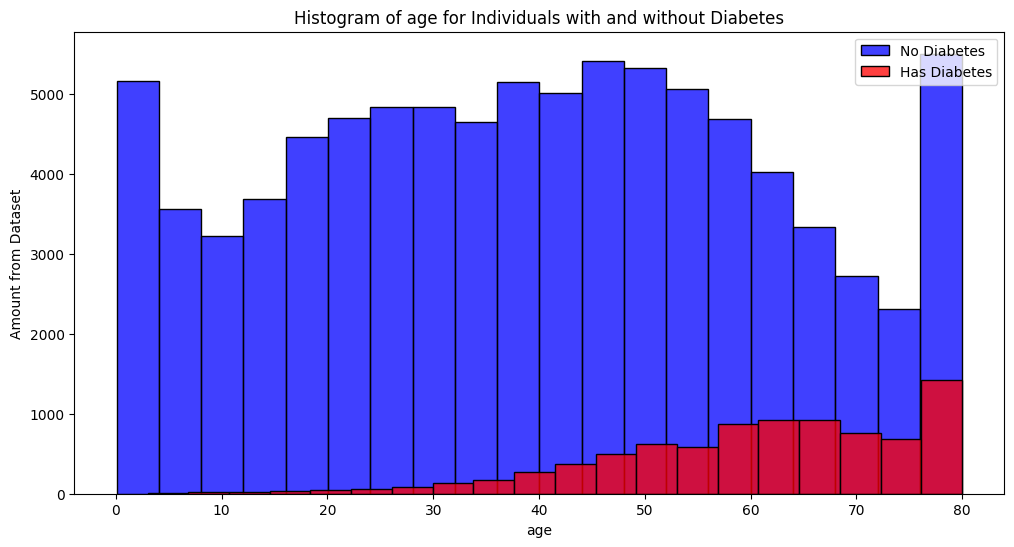

In [19]:
distributionHelp.hist_hasORnot_diab('bmi')
distributionHelp.hist_hasORnot_diab('age')


Distribution of Gender, Additionally with or without diabetes

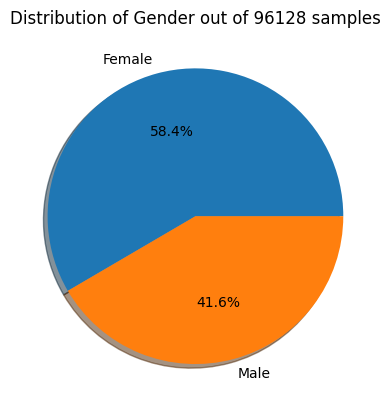

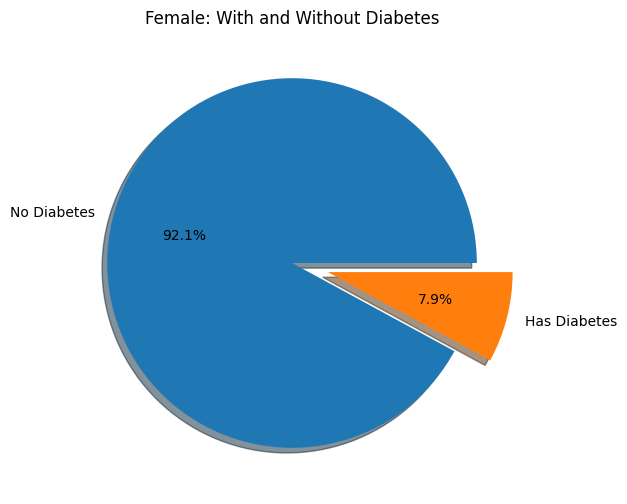

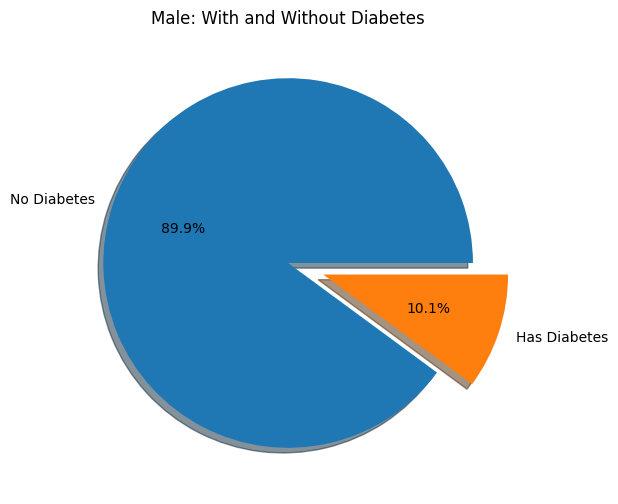

In [20]:
#Splits Gender into Male or Female Piechart
distributionHelp.genderSplit()

#Splits each gender into a piechart with and without Diabetes
distributionHelp.genderSplitbyDiab("Female")
distributionHelp.genderSplitbyDiab("Male")

HbA1c Level & Blood Glucose Level by CDC Interperation:
https://www.cdc.gov/diabetes/basics/getting-tested.html

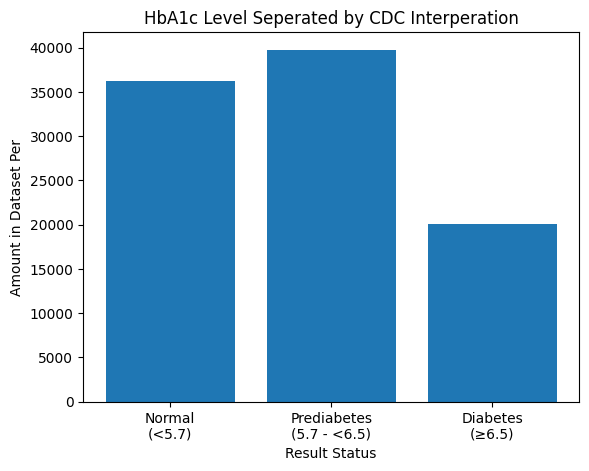

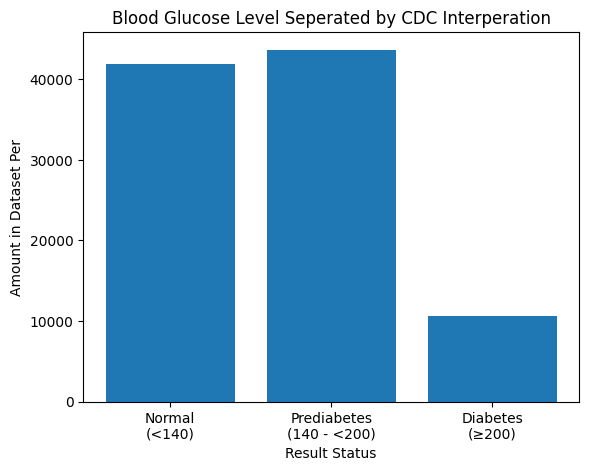

In [21]:
distributionHelp.cdcH1()
distributionHelp.cdcGluc()

# Section 2

In [22]:
#Drop duplicate/statistically insignificant data
db = pd.read_csv("diabetes_prediction_dataset.csv")
df = df.drop_duplicates()
df = df[df['gender'] != 'Other']

#Binarize Data
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0}) 
df['smoking_history'] = df['smoking_history'].apply(convert_smoking_history)
df['smoking_history'] = df['smoking_history'].replace('No Info', np.nan)
df['smoking_history'] = df['smoking_history'].map({'smoker': 1, 'non smoker': 0})

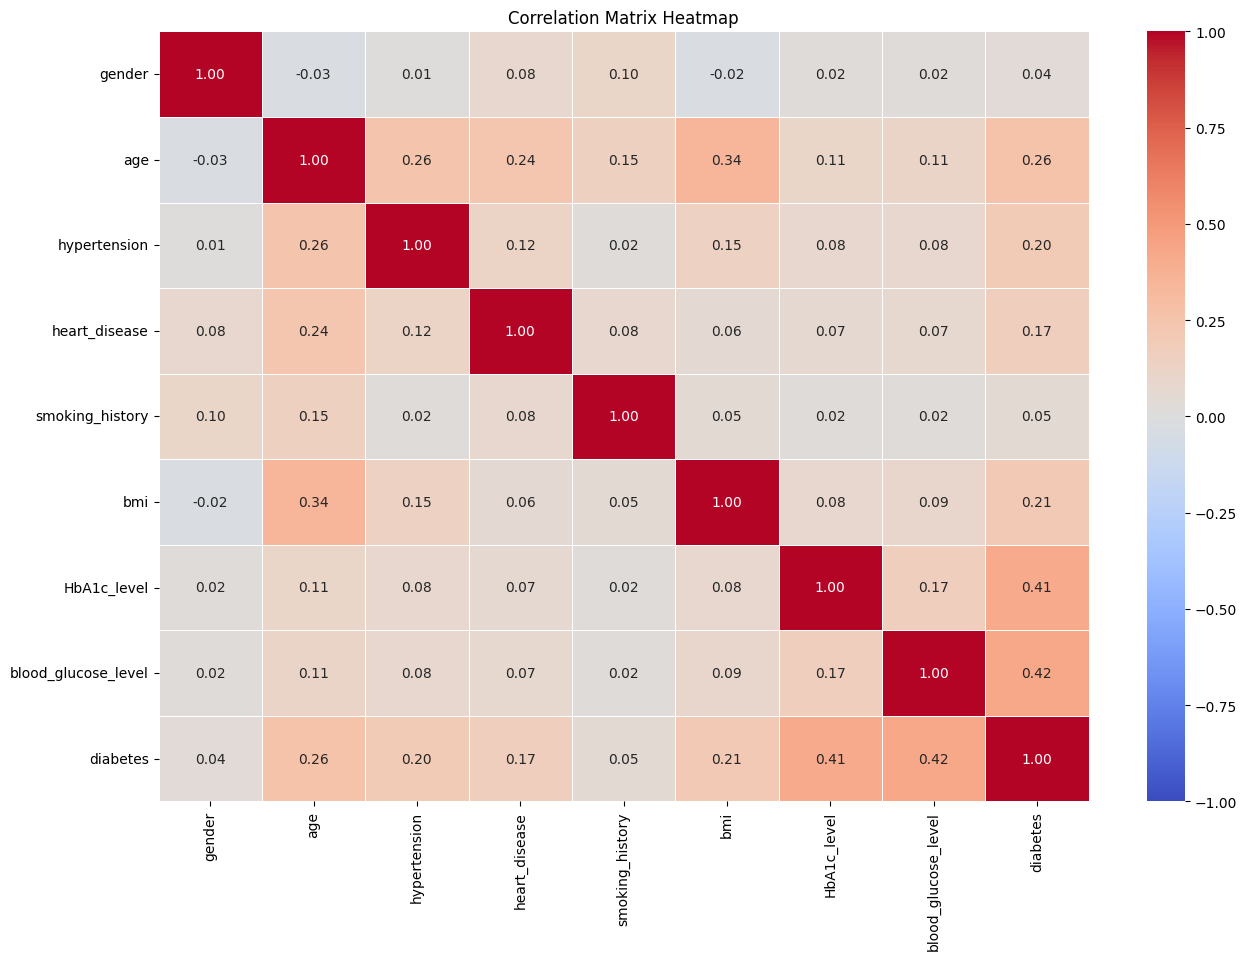

In [23]:
correlation_matrix = calc_correlation_matrix(df)
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', vmin = -1, vmax = 1)
plt.title("Correlation Matrix Heatmap")
plt.savefig("Correlation Matrix Heatmap", bbox_inches='tight', dpi=300)
plt.show()


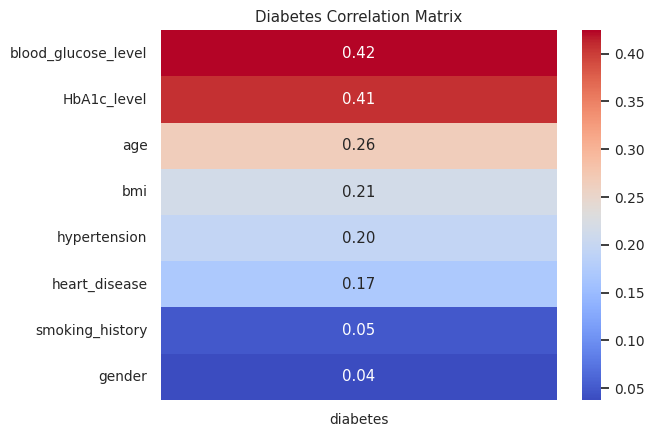

In [24]:
full_corr = df.corr()['diabetes'].drop('diabetes').sort_values(ascending=False).to_frame()
display_diabetes_correlation(full_corr, 'Diabetes Correlation Matrix', '')

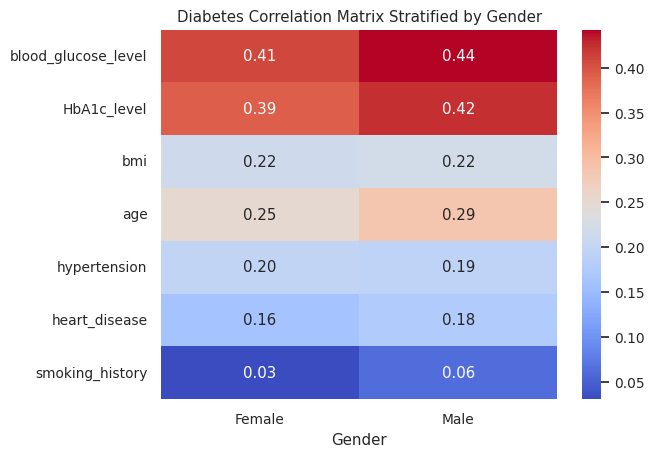

In [25]:
df_male = df[df['gender'] == 1].drop(columns='gender')
df_female = df[df['gender'] == 0].drop(columns='gender')

gender_correlation = {}

gender_correlation['Female'] = df_female.corr()['diabetes'].drop('diabetes')
gender_correlation['Male'] = df_male.corr()['diabetes'].drop('diabetes')

index = ['blood_glucose_level', 'HbA1c_level', 'bmi', 'age', 'hypertension', 'heart_disease', 'smoking_history']

gender_df = pd.DataFrame(gender_correlation)
ordered_gender_df = gender_df.reindex(index)

display_diabetes_correlation(ordered_gender_df, 'Diabetes Correlation Matrix Stratified by Gender', 'Gender')

In [26]:
df_age = age_stratification(df)
buckets = ['0-4', '5-19', '20-49', '50-69', '70+']
index = ['blood_glucose_level', 'HbA1c_level', 'bmi', 'hypertension', 'heart_disease', 'smoking_history', 'gender']
corr_data = {}
for i in range(len(buckets)):
    temp = df_age[i]
    age_group = buckets[i]
    target_corr = temp.corr()['diabetes'].drop('diabetes')
    corr_data[age_group] = target_corr
combined_corr_df = pd.DataFrame(corr_data)
ordered_df = combined_corr_df.reindex(index)

display_diabetes_correlation(ordered_df, 'Diabetes Correlation Matrix Stratified by Age', 'Age Group (years)')
    

ValueError: could not convert string to float: '0-4'

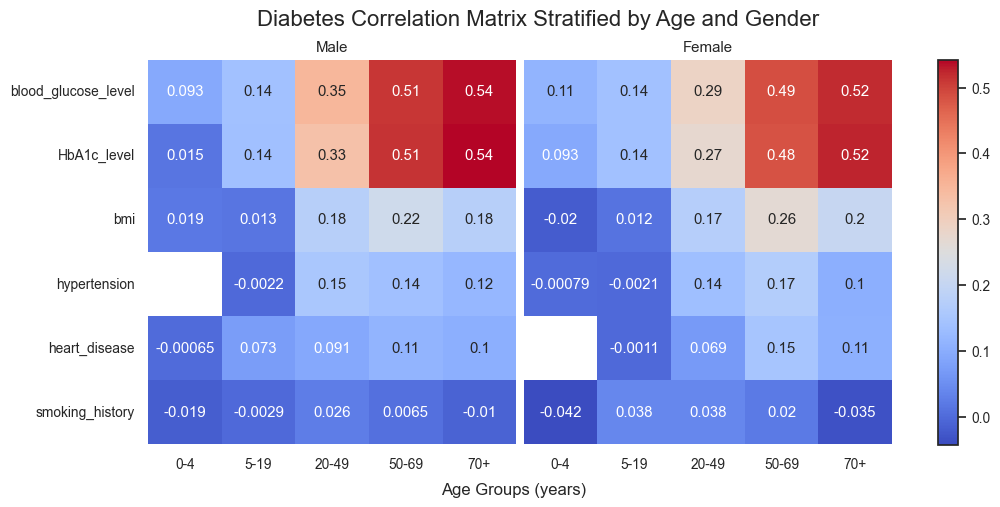

In [ ]:
df_male_age = age_stratification(df_male)
df_female_age = age_stratification(df_female)
male_age_data = {}
female_age_data = {}
index = ['blood_glucose_level', 'HbA1c_level', 'bmi', 'hypertension', 'heart_disease', 'smoking_history']


for i in range(len(buckets)):
    male = df_male_age[i]
    female = df_female_age[i]
    age_group = buckets[i]
    male_age_data[age_group] = male.corr()['diabetes'].drop('diabetes')
    female_age_data[age_group] = female.corr()['diabetes'].drop('diabetes')


male_age_df = pd.DataFrame(male_age_data)
ordered_male_age_df = male_age_df.reindex(index)
female_age_df = pd.DataFrame(female_age_data)
ordered_female_age_df = female_age_df.reindex(index)

vmin = min(ordered_male_age_df.min().min(), ordered_female_age_df.min().min())
vmax = max(ordered_male_age_df.max().max(), ordered_female_age_df.max().max())

fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.subplots_adjust(wspace=0.02)

# Heatmap for males with no color bar and common color limits
sns.heatmap(ordered_male_age_df, ax=axs[0], cmap="coolwarm", annot=True, cbar=False, vmin=vmin, vmax=vmax)
axs[0].set_title('Male')

# Heatmap for females with no color bar and common color limits
sns.heatmap(ordered_female_age_df, ax=axs[1], cmap="coolwarm", annot=True, cbar=False, vmin=vmin, vmax=vmax)
axs[1].set_title('Female')

# Add a color bar to the right of the second subplot
fig.colorbar(axs[1].collections[0], ax=axs, orientation='vertical')
# Set the figure's suptitle (the overall title)
fig.suptitle('Diabetes Correlation Matrix Stratified by Age and Gender', fontsize=16, x= 0.45)

# Set a shared xlabel (label for the x-axis)
fig.text(0.43, 0.02, 'Age Groups (years)', ha='center', va='center', fontsize=12)
plt.savefig('Diabetes Correlation Matrix Stratified by Age and Gender', bbox_inches='tight', dpi=300)
plt.show()

# Section 3

In [27]:
# Load the dataset
data_path = 'diabetes_prediction_dataset.csv'
df = pd.read_csv(data_path)

# Apply the function to the 'smoking_history' column
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(df['smoking_history'].value_counts())

# Identify categorical and numeric columns (adjust as necessary)
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
numeric_cols = [col for col in df.columns if col not in categorical_cols + ['diabetes']]

# Preprocessing for numeric data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Split the dataset
X = df.drop('diabetes', axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(numeric_cols)

smoking_history
non-smoker     70911
past_smoker    19803
current         9286
Name: count, dtype: int64
['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']


In [28]:
# Pipeline for each model
model_pipelines = {name: Pipeline(steps=[('preprocessor', preprocessor),
                                         ('model', model)])
                   for name, model in models.items()}

# Train and predict with all models
predictions = {}
for name, pipeline in model_pipelines.items():
    print(name)
    pipeline.fit(X_train, y_train)
    predictions[name] = pipeline.predict(X_test)

# Evaluate and compare all models
accuracies = {name: accuracy_score(y_test, pred) for name, pred in predictions.items()}
cm_dict = {name: confusion_matrix(y_test, pred) for name, pred in predictions.items()}

# Print accuracies
for name, accuracy in accuracies.items():
    print(f"{name} Accuracy: {accuracy:.4f}")

Logistic Regression


Random Forest
SVM


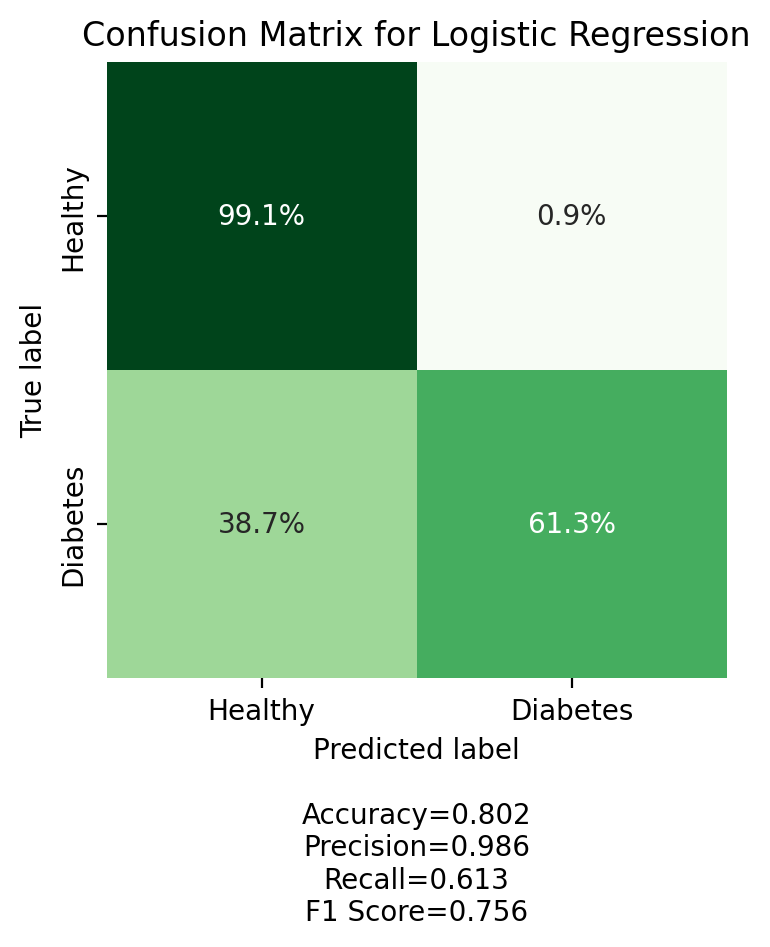

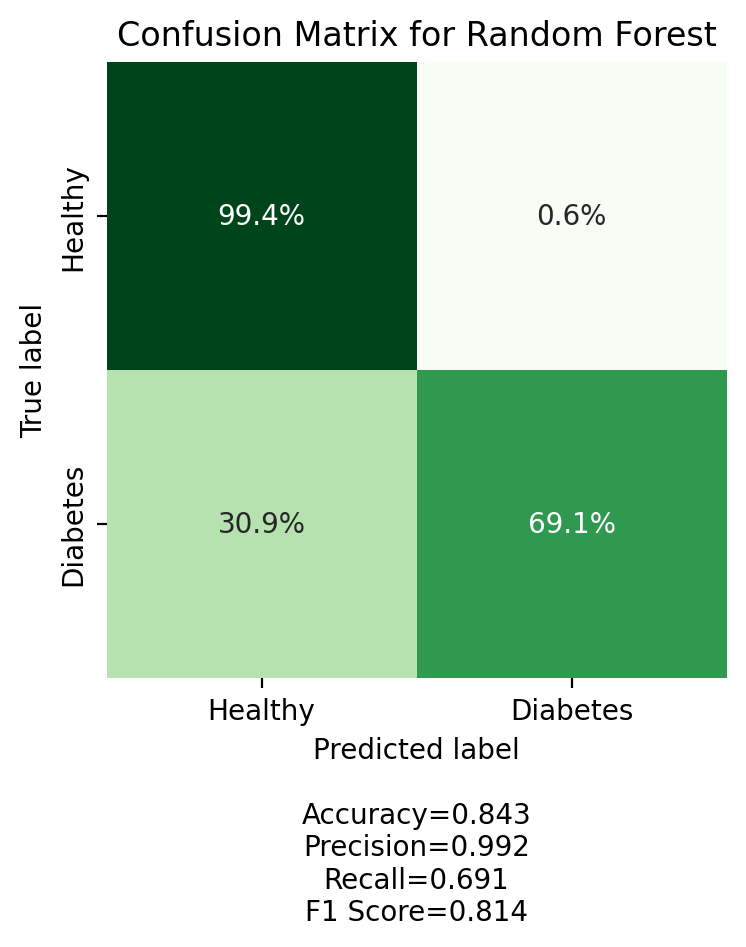

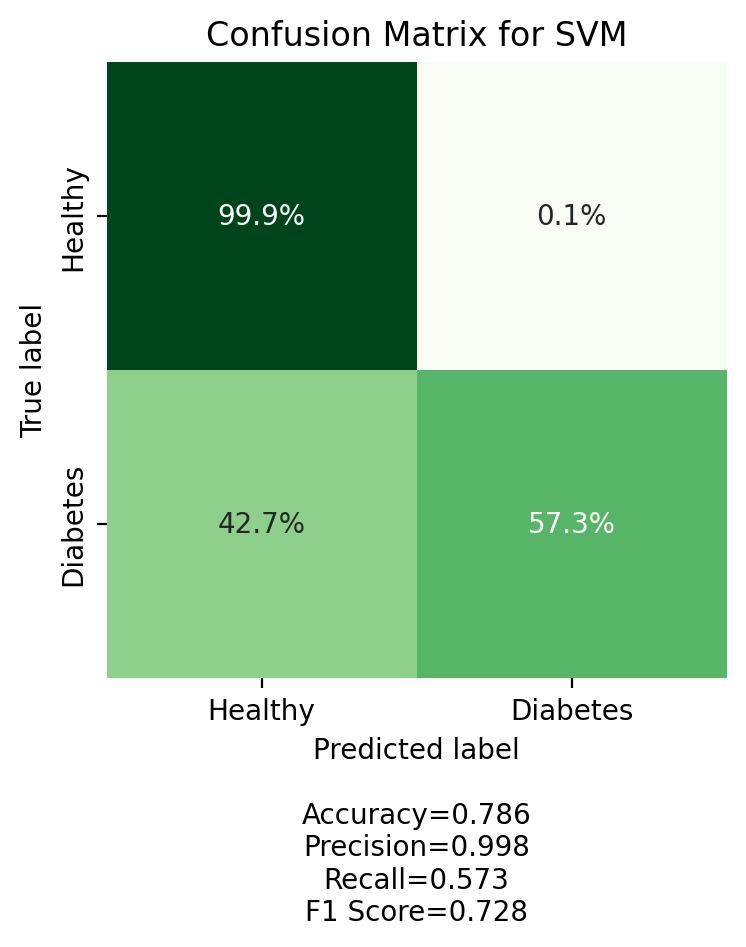

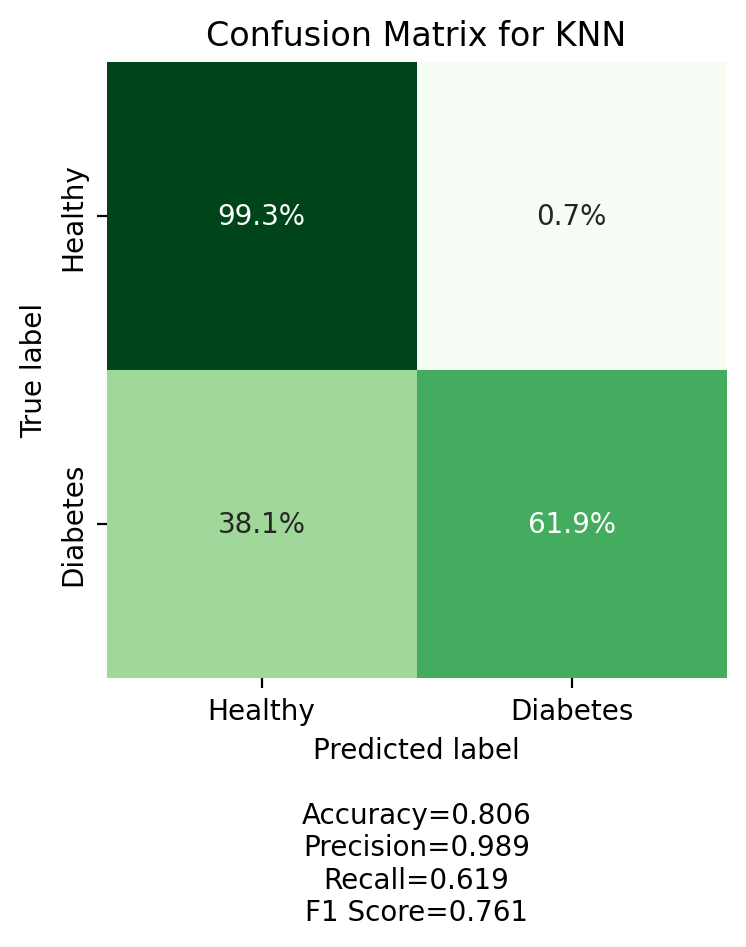

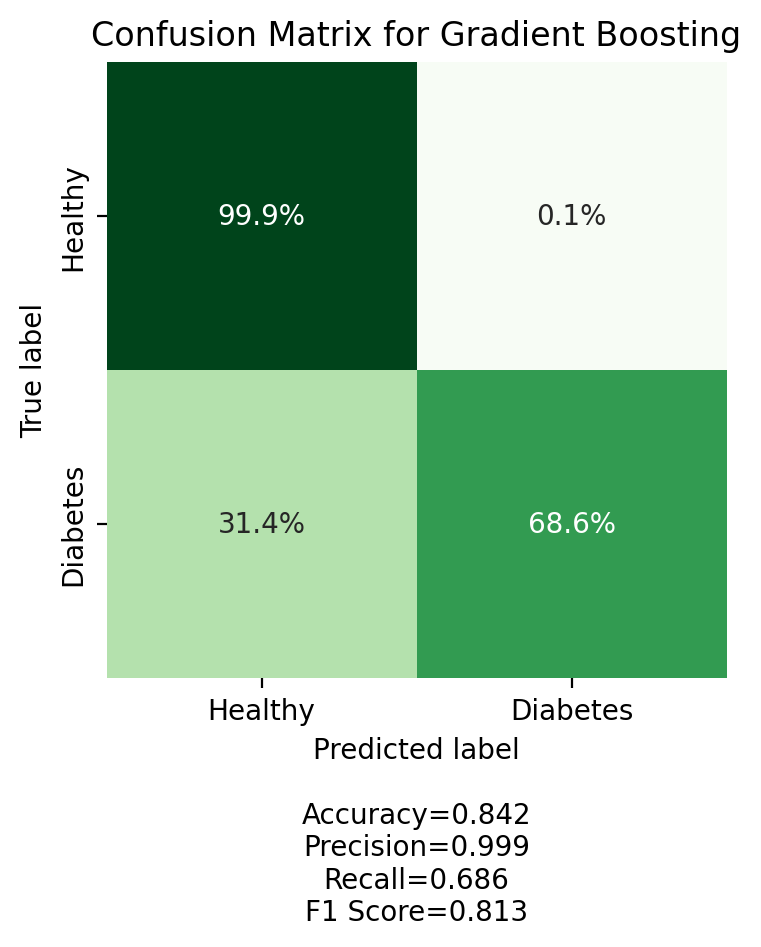

In [ ]:
# Plot confusion matrices for all models
for name, cm in cm_dict.items():
    confusionMat = np.asarray(cm)
    sumconfusion = np.sum(confusionMat, axis=1).T
    summat = np.tile(sumconfusion, (2, 1)).T
    percentconfusion_val = np.divide(confusionMat, summat)

    categories = ['Healthy', 'Diabetes']
    make_confusion_matrix(percentconfusion_val, 
                      #group_names=labels,
                      categories=categories,
                      percent=False,
                      cbar=False,
                      figsize=(4,4),
                      cmap='Greens', my_dpi=200, title=f'Confusion Matrix for {name}',
                      saved=False, save_name='Fig.jpg')

In [ ]:
reports = {}
# Classification reports
for name, pred in predictions.items():
    print(f"{name} Classification Report:")
    reports[name] = classification_report(y_test, pred, output_dict=True)
    print(reports[name])
    print("-----------------------------------------------------")


Logistic Regression Classification Report:
{'0': {'precision': 0.9648254576415496, 'recall': 0.991198338071288, 'f1-score': 0.9778341063531443, 'support': 18292}, '1': {'precision': 0.8667218543046358, 'recall': 0.6129976580796253, 'f1-score': 0.7181069958847737, 'support': 1708}, 'accuracy': 0.9589, 'macro avg': {'precision': 0.9157736559730927, 'recall': 0.8020979980754566, 'f1-score': 0.847970551118959, 'support': 20000}, 'weighted avg': {'precision': 0.9564474099165771, 'recall': 0.9589, 'f1-score': 0.9556534111191455, 'support': 20000}}
-----------------------------------------------------
Random Forest Classification Report:
{'0': {'precision': 0.9717903510177913, 'recall': 0.9943691231139296, 'f1-score': 0.982950093220568, 'support': 18292}, '1': {'precision': 0.9197194076383476, 'recall': 0.6908665105386417, 'f1-score': 0.7890337679705784, 'support': 1708}, 'accuracy': 0.96845, 'macro avg': {'precision': 0.9457548793280695, 'recall': 0.8426178168262857, 'f1-score': 0.8859919305

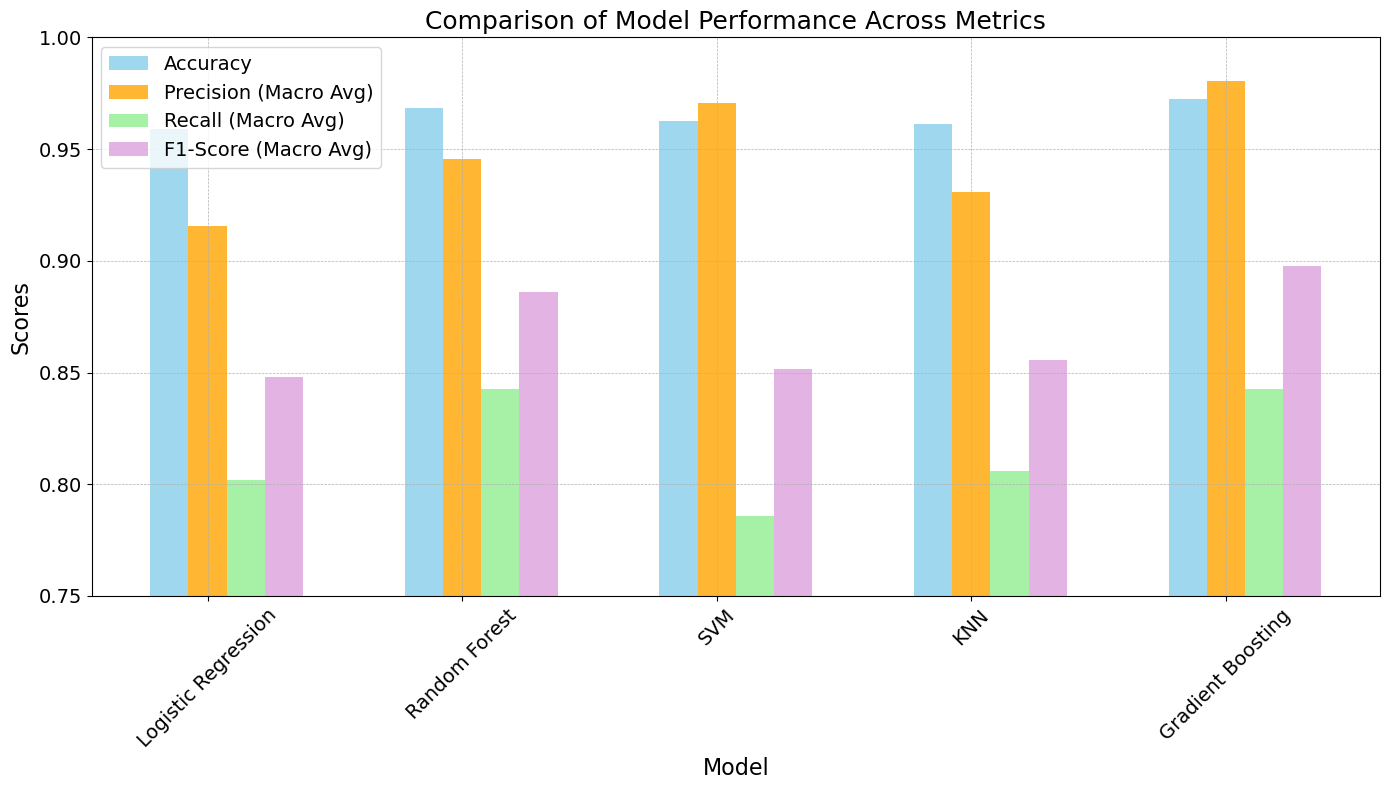

In [ ]:
# Step 1: Extract metrics into a matrix without sorting
extracted_metrics_unsorted = np.array([
    [reports[model]['accuracy'], reports[model]['macro avg']['precision'], reports[model]['macro avg']['recall'], reports[model]['macro avg']['f1-score']]
    for model in models
])

# Model names are the keys of the reports dictionary
models = list(reports.keys())

# Creating the enhanced grouped bar chart again with the new structure
fig, ax = plt.subplots(figsize=(14, 8))
index = np.arange(len(models))
bar_width = 0.15
opacity = 0.8

# Colors for each metric
colors = ['skyblue', 'orange', 'lightgreen', 'plum']

# Defining the number of metrics we are plotting
n_metrics = 4  # Accuracy, Precision (Macro Avg), Recall (Macro Avg), F1-Score (Macro Avg)

# Plotting each metric for the unsorted data
for i in range(n_metrics):
    plt.bar(index + i*bar_width, extracted_metrics_unsorted[:, i], bar_width, alpha=opacity, color=colors[i])

# Adjusting font sizes for better readability
title_fontsize = 18  # Title font size
axis_label_fontsize = 16  # Axis label font size
tick_label_fontsize = 14  # Tick label font size
legend_fontsize = 14  # Legend font size

# Adding aesthetics to the plot with adjusted font sizes
plt.xlabel('Model', fontsize=axis_label_fontsize)
plt.ylabel('Scores', fontsize=axis_label_fontsize)
plt.title('Comparison of Model Performance Across Metrics', fontsize=title_fontsize)
plt.xticks(index + bar_width, models, rotation=45, fontsize=tick_label_fontsize)
plt.yticks(fontsize=tick_label_fontsize)
plt.legend(['Accuracy', 'Precision (Macro Avg)', 'Recall (Macro Avg)', 'F1-Score (Macro Avg)'], loc='upper left', fontsize=legend_fontsize)
plt.ylim(0.75, 1.0)  # Extend the y-axis limit to see differences clearly
plt.grid(True, which='major', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


Logistic Regression does not support feature importance.


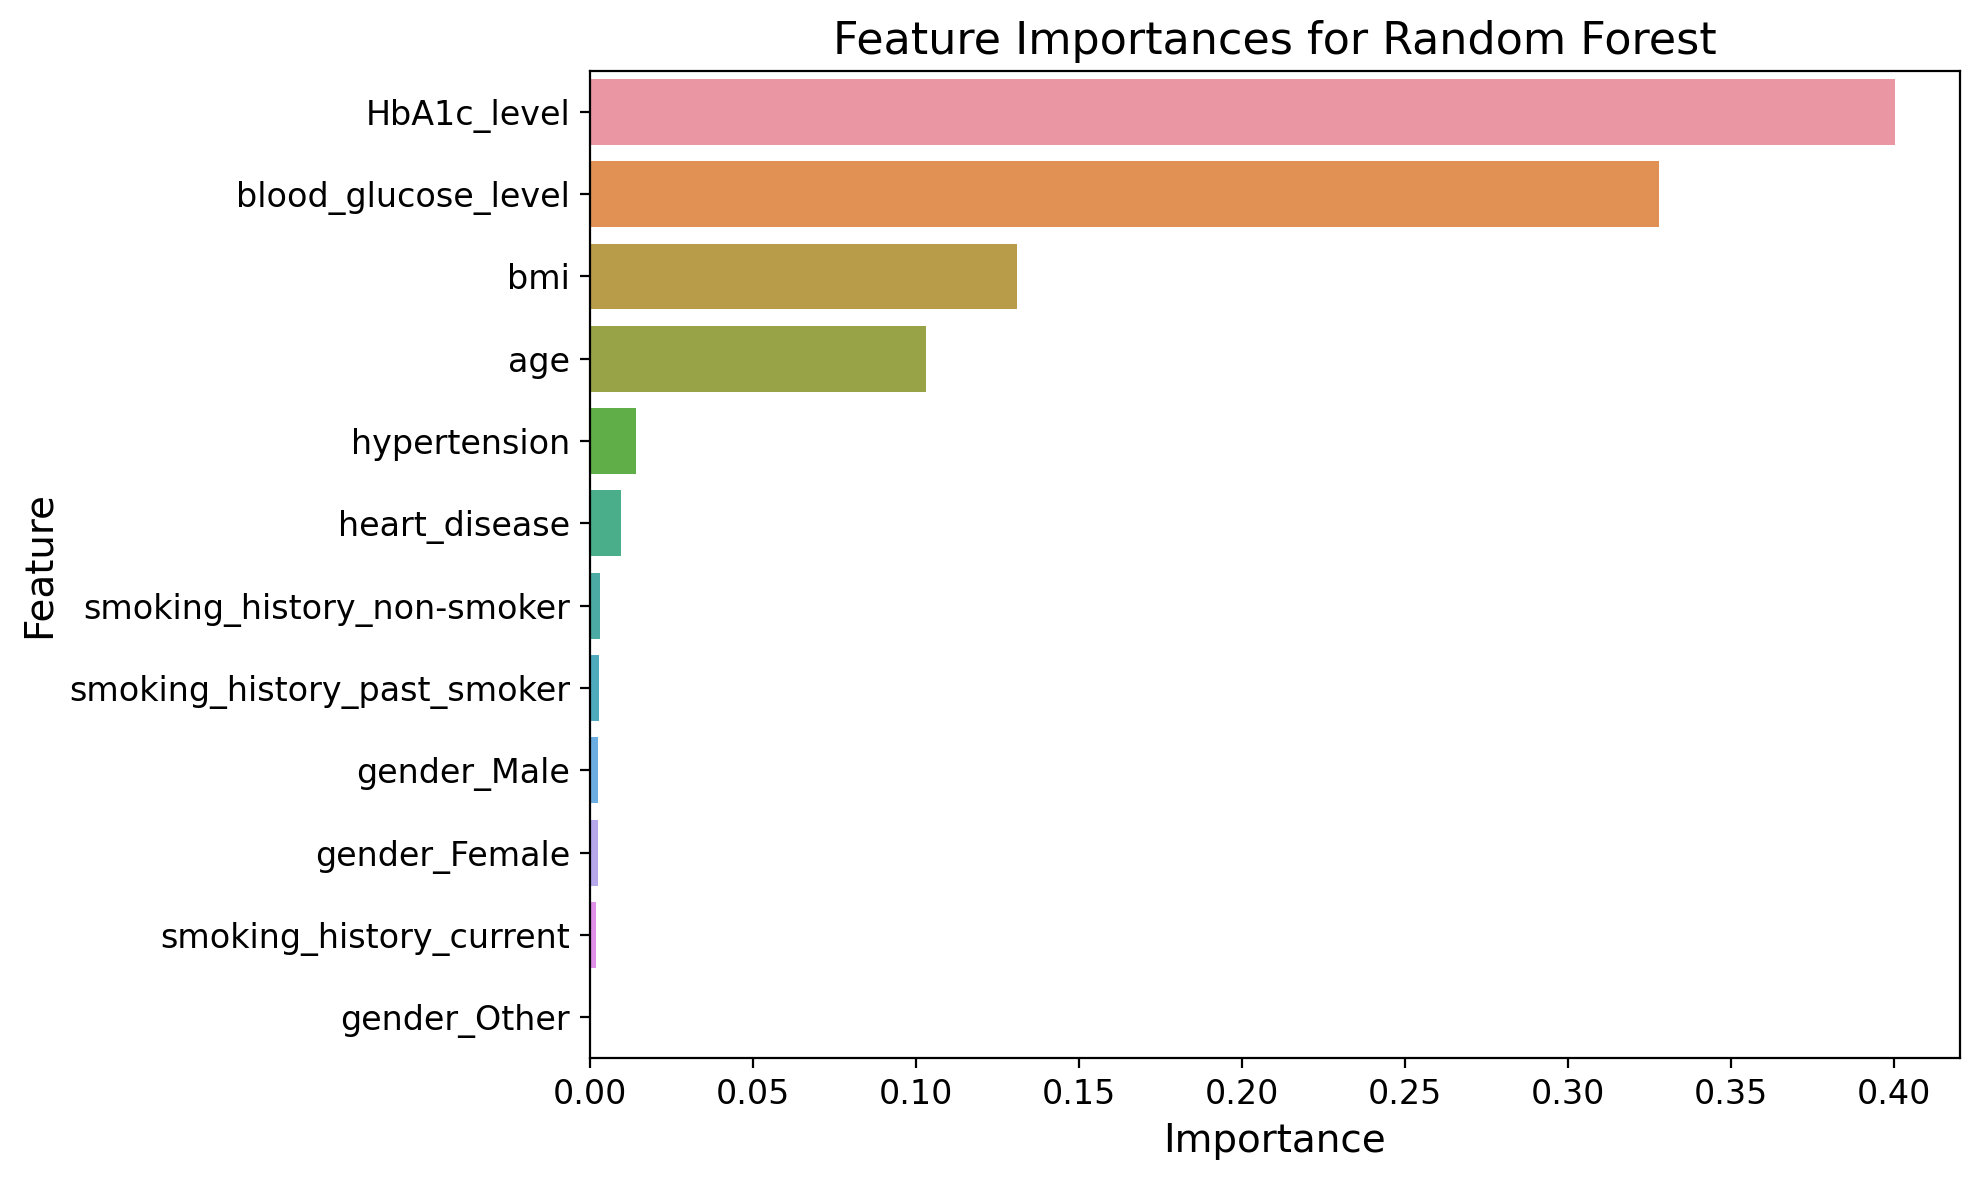

SVM does not support feature importance.
KNN does not support feature importance.


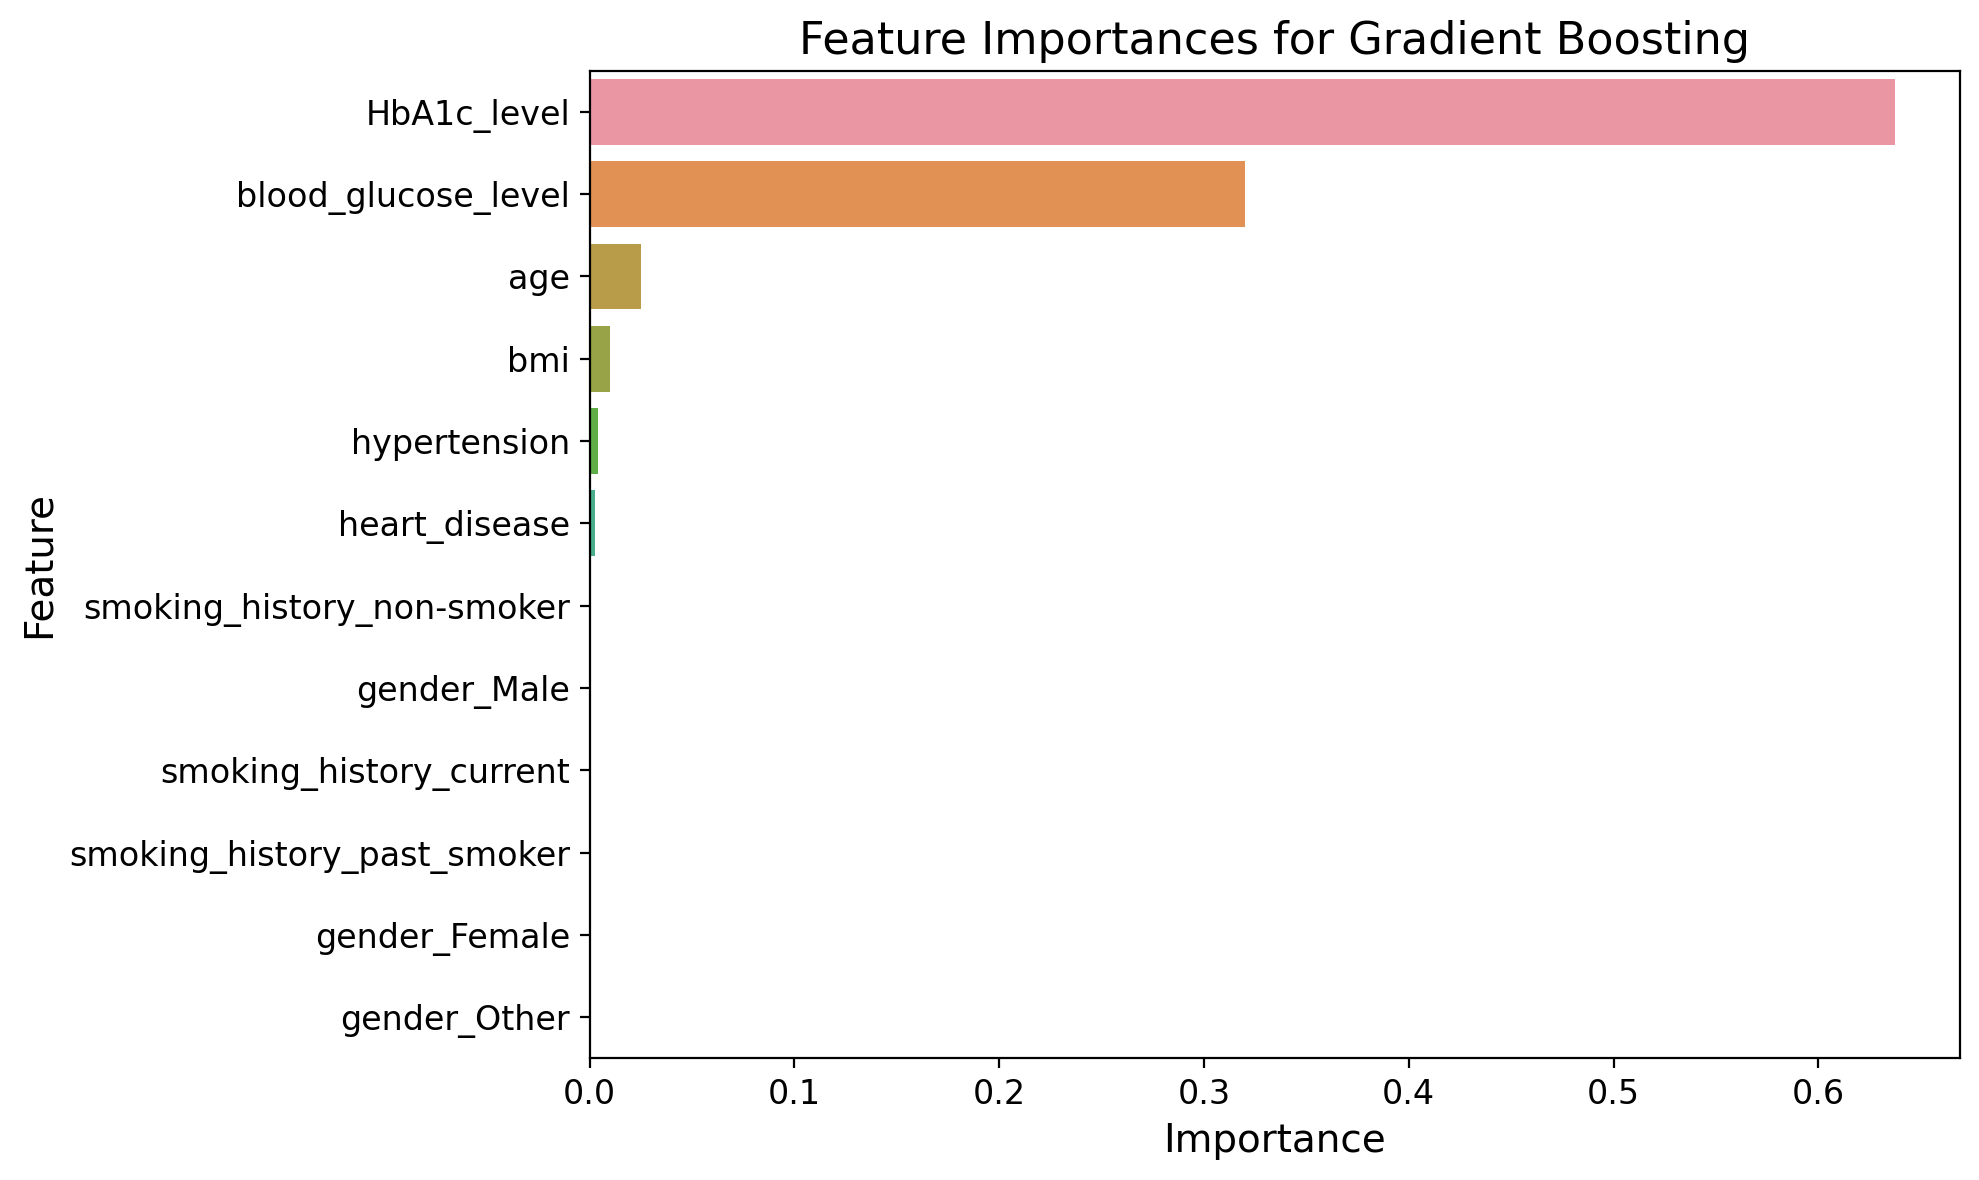

In [ ]:
# Extract transformed feature names
transformed_numeric_features = numeric_cols
transformed_categorical_features = model_pipelines['Random Forest'].named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)
transformed_feature_names = list(transformed_numeric_features) + list(transformed_categorical_features)

# Loop through all models
for name, pipeline in model_pipelines.items():
    plot_feature_importances(pipeline, name, transformed_feature_names)